# Linear Regression

### In this notebook, I will implement linear regression from scratch, I will use the data in the first assignment from the machine learning course in coursera by Andrew Ng. 

In [1]:
# We will start by uploading the libraries needed.
from pandas import read_csv
from matplotlib import pyplot
import numpy

In [2]:
# Loading the data
filename = 'ex1data1.csv'
names = ['Population','Truck_profits']
Dataset = read_csv(filename, names = names)

# Quick printing of the first 20 examples of the data to get an Idea how it looks like
print(Dataset.head(20))

    Population  Truck_profits
0       6.1101       17.59200
1       5.5277        9.13020
2       8.5186       13.66200
3       7.0032       11.85400
4       5.8598        6.82330
5       8.3829       11.88600
6       7.4764        4.34830
7       8.5781       12.00000
8       6.4862        6.59870
9       5.0546        3.81660
10      5.7107        3.25220
11     14.1640       15.50500
12      5.7340        3.15510
13      8.4084        7.22580
14      5.6407        0.71618
15      5.3794        3.51290
16      6.3654        5.30480
17      5.1301        0.56077
18      6.4296        3.65180
19      7.0708        5.38930


In [3]:
# Let's extract the data 
array = Dataset.values
#  and separate input and output
X_ = array[:,:-1]
Y = array[:,-1].reshape(len(X_),1)

#### Before starting with learning algorithms, It's important to plot the data if possible to see how it looks like. Now we have all we need to plot the data.

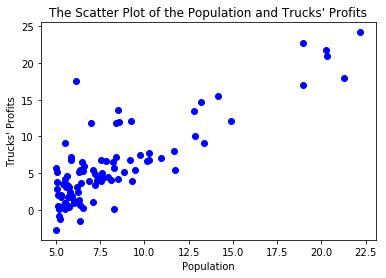

In [4]:
pyplot.scatter(X_,Y, color = 'blue')
pyplot.xlabel("Population")
pyplot.ylabel("Trucks' Profits")
pyplot.title("The Scatter Plot of the Population and Trucks' Profits")
pyplot.show()

#### before I dive into the code, Let's discuss the math behind linear regression

The regression is a line describing the data the best, we achieve this line by minimizing the squared error between the actual data and the predicted data we get from the regression line.
The equation of the regression line looks like the following:

$$Y = \theta_0 + \theta_1X$$

Another way to write the equation is to use vectors and matrices

$$Y = \Theta X$$

In order to be consistent with this notation, we have to add a column of all ones to X, because the first equation can be written as follows:

$$Y = \theta_0 * \begin{bmatrix} 
1 \\
1 \\
. \\
. \\
1
\end{bmatrix} + \theta_1 * X$$

First we start by initializing the coefficients of the regression, Theta. 
In our case the the dimension of Theta is $(2,1)$

In [5]:
Theta = numpy.zeros((2,1))
print(Theta)

[[0.]
 [0.]]


In [6]:
# We add the column of all ones to X, so we have a matrix of 2 columns
X = numpy.c_[numpy.ones(len(X_)),X_]

# We print the first 10 elements
print(X[:10,:])

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]
 [1.     7.4764]
 [1.     8.5781]
 [1.     6.4862]
 [1.     5.0546]]


#### Now let's compute the error function, It's also called the cost function that needs to be minimized to find the optimal coefficient.

In [7]:
def computeCost(X,Y,Theta):
	m = len(Y)
	J = (1/(2*m))*numpy.sum(numpy.square(X.dot(Theta)-Y))
	return J

In [8]:
# We can print the cost function
print(computeCost(X,Y,Theta))

32.072733877455676


To minimize the cost function as a function of Theta, we have to compute the gradient.
The gradient is the vector of first order partial derivatives for each component. We will use this gradient to update the coefficients of the regression later.

In [10]:
def computeGradient(X,Y,Theta):
	m = len(Y)
	gradient = (1/m)*numpy.sum((X.dot(Theta)-Y)*X, axis=0)
	size = gradient.shape[0]
	return gradient.reshape(size,1)

The computeGradient function returns the gradient vector which has a dimension of $(2,1)$

Now we have all the tools to start applying the gradient descent, which is an algorithm that uses the gradient to update the coefficients.
In order to apply the algorithm we have to define the number of iterations and the learning rate.

In [11]:
iterations = 10000
learning_rate = 0.01

And then we define the gradientDescent function:

In [12]:
def gradientDescent(X,Y,iterations,learning_rate,Theta):
	i = 0
	error = []
	while i<iterations:
		gradient = computeGradient(X,Y,Theta)
		Theta = Theta - learning_rate*gradient
		error.append(computeCost(X,Y,Theta))
		i += 1
	error = numpy.asarray(error)
	return Theta,error

In [13]:
# We run the gradient descent algorithm, that's returning the optimal coefficients and the error for each iteration.
Theta,error = gradientDescent(X,Y,iterations,learning_rate,Theta)

In [14]:
# The predicted output using the regression we have found is
PredictedY = X.dot(Theta)

#### Now It's time to plot the regression and the error function as a function of the number of iterations

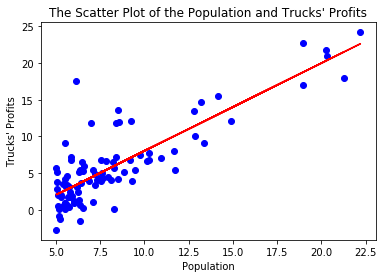

In [15]:
pyplot.scatter(X_,Y, color = 'blue')
pyplot.xlabel("Population")
pyplot.ylabel("Trucks' Profits")
pyplot.title("The Scatter Plot of the Population and Trucks' Profits")

pyplot.plot(X_,PredictedY,color = 'red')

pyplot.show()

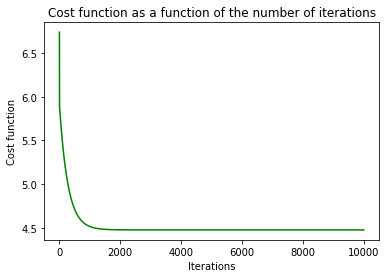

In [16]:
# The error function as a function of iterations
pyplot.plot(range(iterations),error,color = 'green')
pyplot.xlabel("Iterations")
pyplot.ylabel("Cost function")
pyplot.title("Cost function as a function of the number of iterations")

pyplot.show()

In [17]:
# So the mean squared error is 
print(computeCost(X,Y,Theta))

4.476971375975179


### Now I would like to solve the same problem using sklearn.

In [18]:
# Importing the libraries needed
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
# We start by splitting th data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_,Y,test_size = 0.2,random_state = 7)

# Applying the LinearRegression class
regression = LinearRegression()
regression.fit(X_train,Y_train)
Pred = regression.predict(X_test)

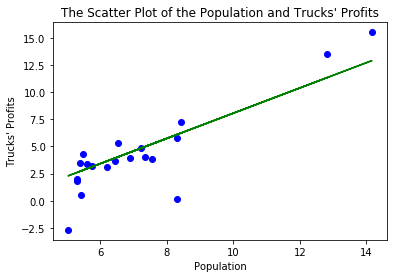

In [20]:
# We plot the regression line
pyplot.scatter(X_test,Y_test, color = 'blue')
pyplot.xlabel("Population")
pyplot.ylabel("Trucks' Profits")
pyplot.title("The Scatter Plot of the Population and Trucks' Profits")
pyplot.plot(X_test,Pred,color = 'green')

pyplot.show()

In [21]:
print(mean_squared_error(Pred,Y_test))

4.303883384543663


### Let's apply the gradient descent algorithm to a multi-features problem

In [22]:
filename = 'ex1data2.csv'
names = ['Size','No. Bedrooms','Price']
Dataset = read_csv(filename, names = names)

print(Dataset.head(20))

    Size  No. Bedrooms   Price
0   2104             3  399900
1   1600             3  329900
2   2400             3  369000
3   1416             2  232000
4   3000             4  539900
5   1985             4  299900
6   1534             3  314900
7   1427             3  198999
8   1380             3  212000
9   1494             3  242500
10  1940             4  239999
11  2000             3  347000
12  1890             3  329999
13  4478             5  699900
14  1268             3  259900
15  2300             4  449900
16  1320             2  299900
17  1236             3  199900
18  2609             4  499998
19  3031             4  599000


Before we apply gradient descent, we have to normalize the features first

In [23]:
def normalizeFeatures(array):
	X_ = array[:,:-1]
	mean = numpy.mean(X_,axis = 0)
	stdv = numpy.std(X_,axis = 0)
	X_ = (X_ - mean)/stdv
	return X_

In [24]:
array = Dataset.values
# Separate input and output

X_ = normalizeFeatures(array)

X = numpy.c_[numpy.ones(len(X_)),X_]

Y = array[:,-1].reshape(len(X_),1)

In [25]:
Theta = numpy.zeros((3,1))
iterations = 1000
learning_rate = 0.01

Theta,error = gradientDescent(X,Y,iterations,learning_rate,Theta)
PredictedY = X.dot(Theta)

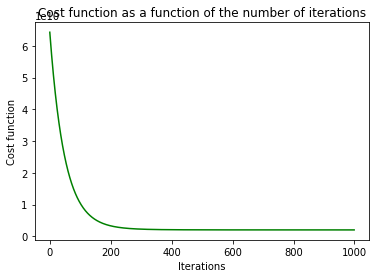

In [26]:
# The error function as a function of iterations
pyplot.plot(range(iterations),error,color = 'green')
pyplot.xlabel("Iterations")
pyplot.ylabel("Cost function")
pyplot.title("Cost function as a function of the number of iterations")

pyplot.show()